## Exercise 1
ME44312 Machine Learning for Transport and Multi-Machine Systems

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os

In [2]:
path = os.getcwd() + '\data\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.489697,5.839135
std,4.654319,5.510262
min,5.026900,-2.680700
25%,5.710700,1.986900
50%,6.882500,4.562300
75%,8.825400,7.046700
max,29.270000,24.147000


<AxesSubplot: xlabel='Population', ylabel='Profit'>

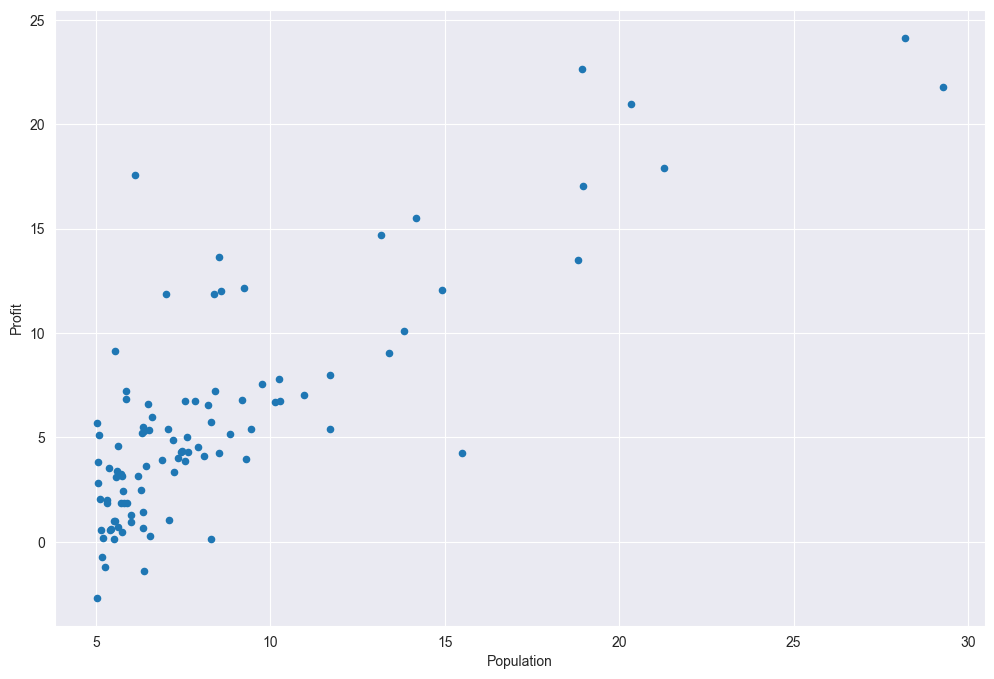

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))

### PART A: CALCULATE THE COSTS

In [5]:
# Implement the missing parts of the cost function method below!
def h(x, theta):
	return theta[0][0] + theta[0][1] * x

def compute_cost(X, y, theta):
    residual = []
    for i in range(len(y)):
        residual.append((h(X[i], theta) - y[i])**2)
    return np.sum(residual) / (2 * X.shape[0])

In [6]:
# Add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.

data.insert(0, 'Ones', 1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# Initializing the variables, setting X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

#Printing to double-check
X.head()
print(X)
y.head()
print(y)

    Ones  Population
0      1      6.1101
1      1      5.5277
2      1      8.5186
3      1      7.0032
4      1      5.8598
..   ...         ...
92     1      5.8707
93     1      5.3054
94     1      8.2934
95     1     13.3940
96     1      5.4369

[97 rows x 2 columns]
      Profit
0   17.59200
1    9.13020
2   13.66200
3   11.85400
4    6.82330
..       ...
92   7.20290
93   1.98690
94   0.14454
95   9.05510
96   0.61705

[97 rows x 1 columns]


In [8]:
# The cost function is expecting numpy arrays. Therefore, convert X and y.
X = np.array(X.values)
y = np.array(y.values)
theta = np.array([[.0, .0]])

# Again, printing to double-check
print(theta)
print(X.shape, theta.shape, y.shape)

[[0. 0.]]
(97, 2) (1, 2) (97, 1)


In [9]:
# Computing the cost
cost = compute_cost(X, y, theta)
print(cost)

64.14546775491134


### PART B: GRADIENT DESCENT

In [10]:
# Implement the missing parts (i.e, calculate  theta[0,j] in the inner loop)
# of the gradient descent method below!

def gradient_descent(X, y, theta, alpha, iters):
    parameters = theta.shape[1]
    cost = np.zeros([iters, 1])

    for i in range(iters):
        error = (X @ theta.T) - y

        for j in range(parameters):
            term = error * X[:, j:j + 1]
            theta[0,j] -= alpha / X.shape[0] * np.sum(term) ## DOES NOT WORK YET

        cost[i, 0] = compute_cost(X, y, theta)

    return theta, cost

In [11]:
# Initialize the learning rate and the number of iterations
alpha = 0.01
iters = 2000

# Perform gradient descent and print result
g, cost = gradient_descent(X, y, theta, alpha, iters)
print(g)

[[-2.31205193  0.96080574]]


In [12]:
# Calculate and print costs
cost2 = compute_cost(X, y, g)
print(cost2)

45.95742088260402


Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

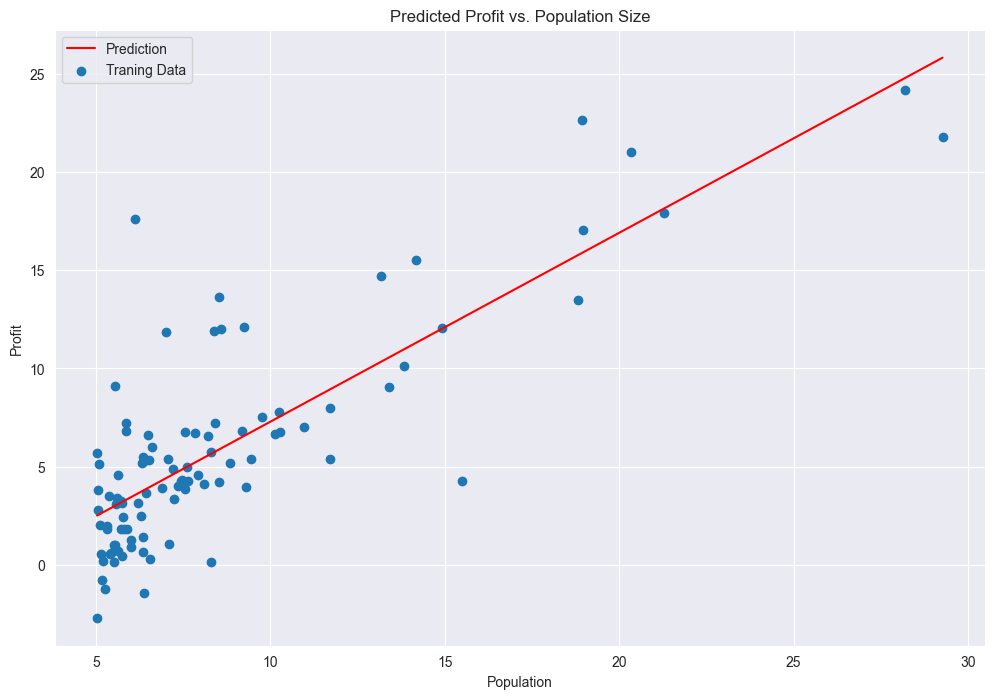

In [13]:
# Plot the results
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

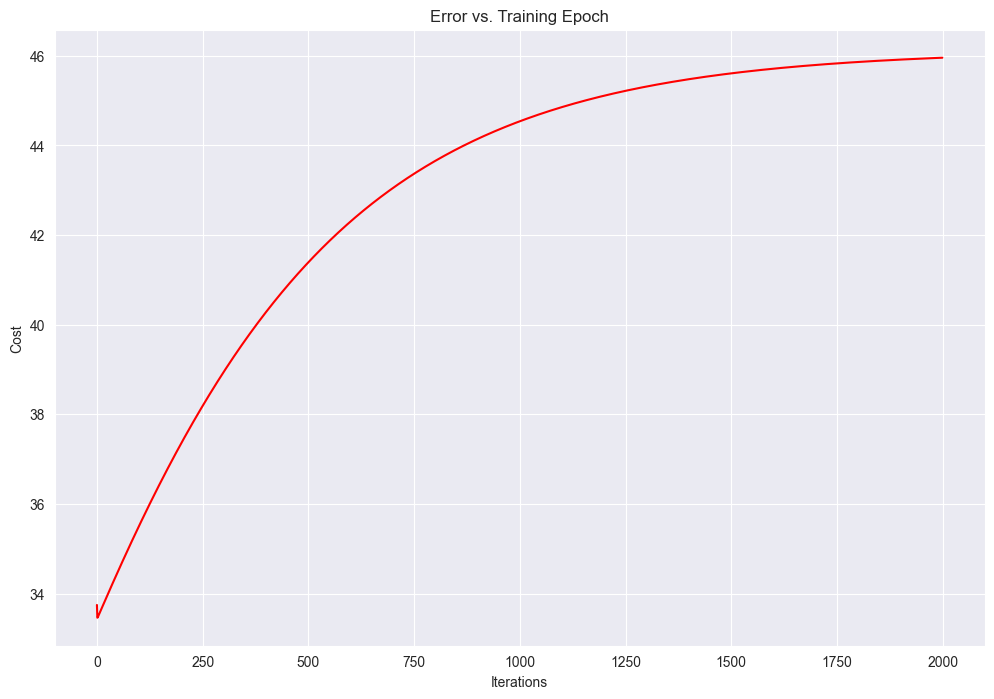

In [14]:
# Plot the cost values over the iterations of the gradient descent algorithm
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### PART C: LINEAR REGRESSION WITH MULTIPLE VARIABLES

In [15]:
# Read the extended data set
path = os.getcwd() + '\data\ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Poplation Density', 'Mobility Hubs', 'Profit'])
print(data2.head())

   Poplation Density  Mobility Hubs  Profit
0               2104              3  399900
1               1600              3  329900
2               2400              3  369000
3               1416              2  232000
4               3000              4  539900


In [16]:
# apply the z-score method in Pandas using the .mean() and .std() methods
def z_score(df):
    # copy the dataframe
    df_std = df.copy()
    # apply the z-score method
    for column in df_std.columns:
        df_std[column] = (df_std[column] - df_std[column].mean()) / df_std[column].std()
    return df_std

# call the z_score function
data2 = z_score(data2)
print(data2.head())

   Poplation Density  Mobility Hubs    Profit
0           0.130010      -0.223675  0.475747
1          -0.504190      -0.223675 -0.084074
2           0.502476      -0.223675  0.228626
3          -0.735723      -1.537767 -0.867025
4           1.257476       1.090417  1.595389


In [17]:
# Add ones column
data2.insert(0, 'Ones', 1)

# Set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:, 0:cols - 1]
y2 = data2.iloc[:, cols - 1:cols]

# Convert to np arrays and initialize theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.array([[.0, .0, .0]])

In [18]:
alpha = 0.0025
iters = 5000

# perform linear regression on the data set
g2, cost2 = gradient_descent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
compute_cost(X2, y2, g2)
costsmv = compute_cost(X2, y2, g2)
print(costsmv)

1.499419007656291


Text(0.5, 1.0, 'Error vs. Training Epoch')

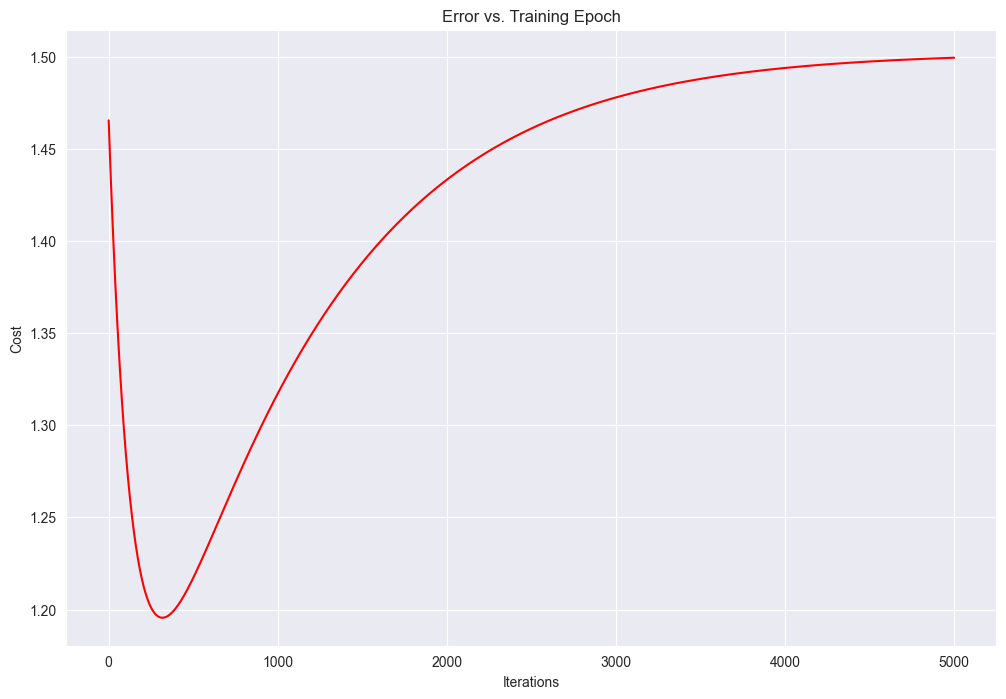

In [19]:
# Plot the learning porgress (as before)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

### PART D: LINEAR REGRESSION WITH SCIKIT-LEARN

In [20]:
# Instead of implementing these algorithms from scratch, one could also use scikit-learn's linear regression function.
# See skit learn documentation for details

# Implement the linear regression example from PART A with scikit-learn below!
from sklearn import linear_model
model = linear_model.LinearRegression().fit(X, y)

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

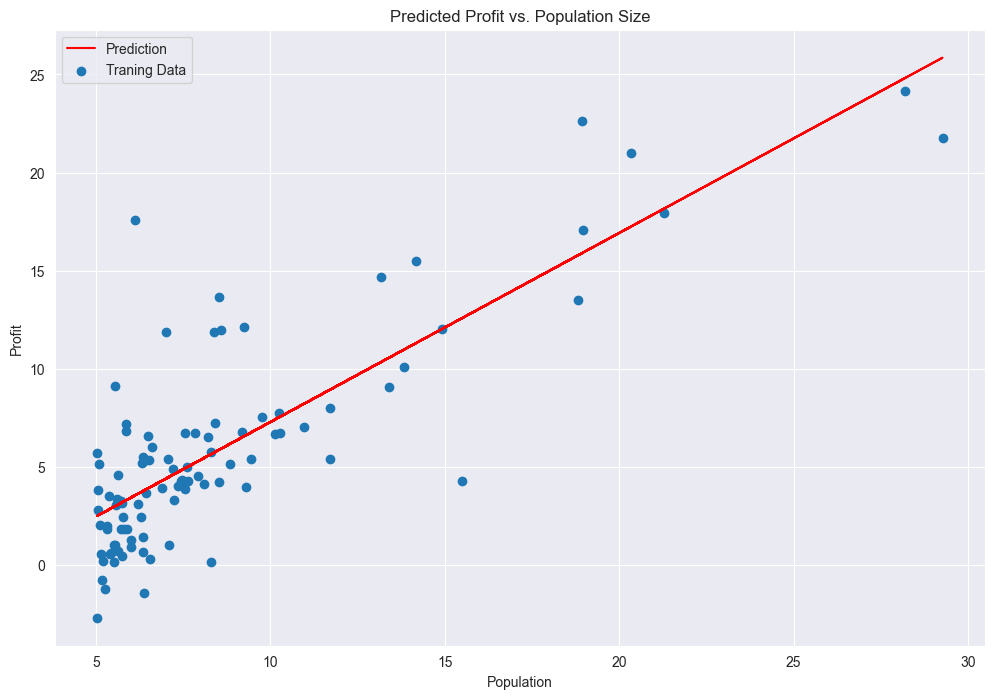

In [21]:
# Plot the results
f = model.predict(X).flatten()
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(X[:, 1], f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')